In [4]:
!pip install lightgbm

Imports

In [5]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving the model
from PIL import Image
import streamlit as st

# Load the dataset
train_data = pd.read_csv("train.csv")  # Replace with your actual file path
test_data = pd.read_csv("test.csv")   # Replace with your actual file path

In [6]:
# Split features and labels
X = train_data.drop(columns=["label"]).values / 255.0  # Normalize pixel values
y = train_data["label"].values

# Dimensionality reduction (optional, improves speed for LightGBM)
pca = PCA(n_components=150)  # Reduce to 150 principal components
X_reduced = pca.fit_transform(X)

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [7]:
# Prepare LightGBM dataset
train_dataset = lgb.Dataset(X_train, label=y_train)
valid_dataset = lgb.Dataset(X_valid, label=y_valid, reference=train_dataset)

# LightGBM parameters
params = {
    "objective": "multiclass",
    "num_class": 10,
    "metric": "multi_logloss",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "max_depth": 10,
    "num_leaves": 31,
    "verbose": -1,
}

In [13]:
from lightgbm import early_stopping

# Train LightGBM model
model = lgb.train(
    params,
    train_dataset,
    valid_sets=[train_dataset, valid_dataset],
    num_boost_round=400,
    callbacks=[early_stopping(stopping_rounds=20)]
)

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[317]	training's multi_logloss: 0.000887877	valid_1's multi_logloss: 0.116331


In [14]:
# Save the model
joblib.dump(model, "digit_recognition_model.pkl")

['digit_recognition_model.pkl']

In [15]:
# Evaluate on validation set
y_valid_pred = np.argmax(model.predict(X_valid), axis=1)
print("Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))

Accuracy: 0.965
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.99      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.95      0.95       937
           4       0.96      0.97      0.96       839
           5       0.94      0.96      0.95       702
           6       0.97      0.98      0.97       785
           7       0.97      0.96      0.97       893
           8       0.96      0.96      0.96       835
           9       0.95      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.96      0.97      0.96      8400
weighted avg       0.97      0.96      0.96      8400



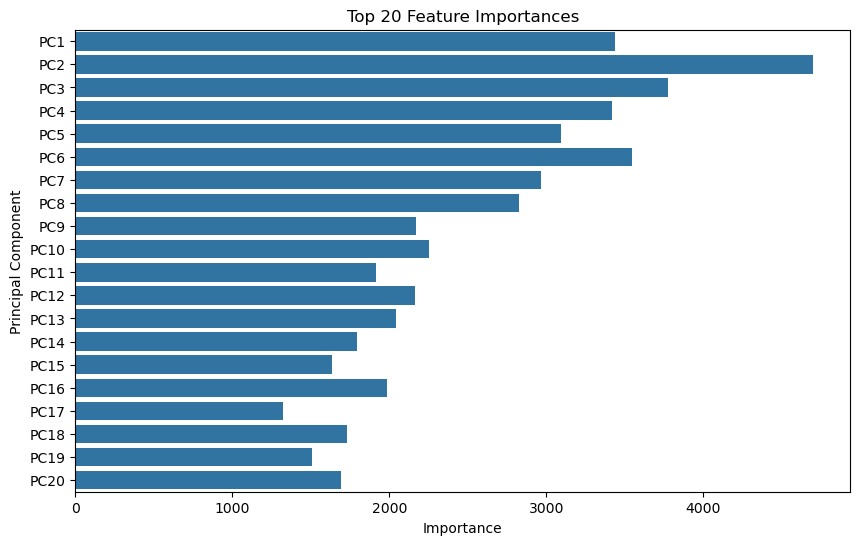

In [16]:
# Feature importance visualization
importance = model.feature_importance()
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[:20], y=[f"PC{i+1}" for i in range(20)])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Principal Component")
plt.show()


Accuracy: 0.965
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.99      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.95      0.95       937
           4       0.96      0.97      0.96       839
           5       0.94      0.96      0.95       702
           6       0.97      0.98      0.97       785
           7       0.97      0.96      0.97       893
           8       0.96      0.96      0.96       835
           9       0.95      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.96      0.97      0.96      8400
weighted avg       0.97      0.96      0.96      8400



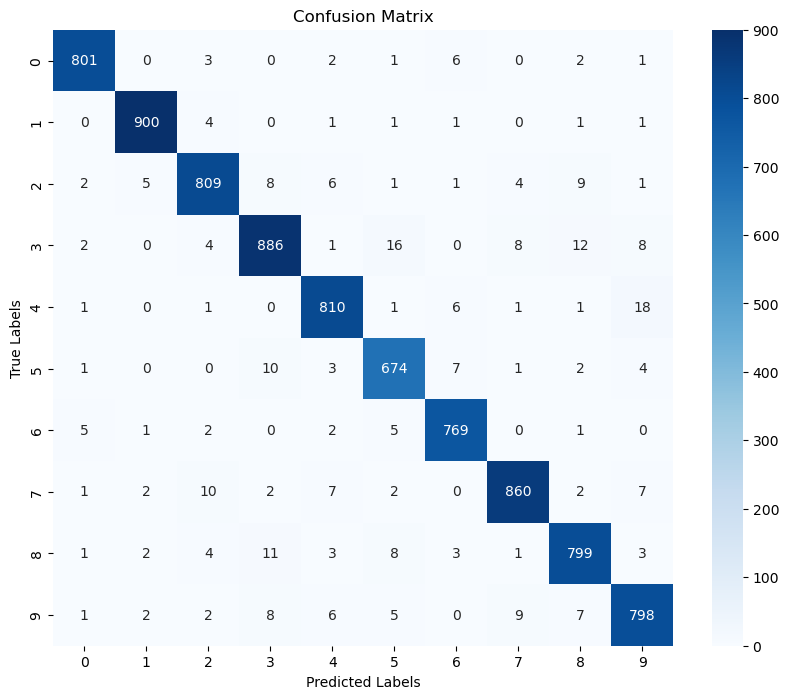

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate on validation set
y_valid_pred = np.argmax(model.predict(X_valid), axis=1)

# Calculate Accuracy
accuracy = accuracy_score(y_valid, y_valid_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))

# Confusion matrix
cm = confusion_matrix(y_valid, y_valid_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [18]:
# Save PCA model
joblib.dump(pca, "pca_model.pkl")

['pca_model.pkl']